In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
model_metadata = pd.read_csv("../../config/models.csv")
palette = model_metadata.set_index("description")["color"].to_dict()
model_renaming = model_metadata.set_index("name")["description"].to_dict()
model_metadata

,name,description,color
0,CADD,CADD,C0
1,GPN-MSA,GPN-MSA,C1
2,Borzoi,Borzoi,C2
3,Enformer,Enformer,C3
4,GPN_final,GPN-Promoter,C4
5,NucleotideTransformer,NT,C5
6,HyenaDNA,HyenaDNA,C6
7,Caduceus,Caduceus,hotpink
8,CADD+GPN-MSA+Borzoi,Ensemble,C8
9,Sei,Sei,C9


In [3]:
dataset_renaming = {
    "mendelian_traits_matched_9": "Mendelian traits",
    "complex_traits_matched_9": "Complex traits",
}

subset_renaming = {
    "nonexonic_AND_distal": "Non-exonic\n(distal)",
    "nonexonic_AND_proximal": "Non-exonic\n(proximal)",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

In [4]:
datasets = [
    "mendelian_traits_matched_9",
    "complex_traits_matched_9",
]

subsets = [
    "nonexonic_AND_distal",
    "nonexonic_AND_proximal",
    "5_prime_UTR_variant",
    "3_prime_UTR_variant",
    "non_coding_transcript_exon_variant",
]

models = [
    "CADD",
    "evo2_1b_base",
    "evo2_7b",
    "evo2_40b",
]

metric = "AUPRC"

def get_model_path(model, dataset, subset):
    if model == "CADD":
        predictor = "CADD.plus.RawScore"
    else:
        if "mendelian" in dataset:
            llr_version = "LLR"
            sign = "minus"
        elif "complex" in dataset:
            llr_version = "absLLR"
            sign = "plus"
        predictor = f"{model}_{llr_version}.{sign}.score"
    return f"../../results/dataset/{dataset}/{metric}/{subset}/{predictor}.csv"

In [5]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for model in models:
            model_for_path = model
            path = get_model_path(
                model_for_path,
                dataset,
                subset
            )
            df = pd.read_csv(path).iloc[0]
            rows.append([
                dataset_renaming.get(dataset, dataset),
                subset_renaming.get(subset, subset),
                model_renaming.get(model, model),
                df[metric],
                df["se"],
            ])
df = pd.DataFrame(rows, columns=["dataset", "subset", "model", "score", "se"])
df

,dataset,subset,model,score,se
0,Mendelian traits,Non-exonic\n(distal),CADD,0.722522,0.072254
1,Mendelian traits,Non-exonic\n(distal),Evo2 1B,0.117347,0.016816
2,Mendelian traits,Non-exonic\n(distal),Evo2 7B,0.126100,0.026644
3,Mendelian traits,Non-exonic\n(distal),Evo2 40B,0.163328,0.043669
4,Mendelian traits,Non-exonic\n(proximal),CADD,0.736095,0.041379
5,Mendelian traits,Non-exonic\n(proximal),Evo2 1B,0.137120,0.020211
6,Mendelian traits,Non-exonic\n(proximal),Evo2 7B,0.278515,0.041497
7,Mendelian traits,Non-exonic\n(proximal),Evo2 40B,0.608813,0.038933
8,Mendelian traits,5' UTR,CADD,0.574898,0.041078
9,Mendelian traits,5' UTR,Evo2 1B,0.199941,0.033737


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

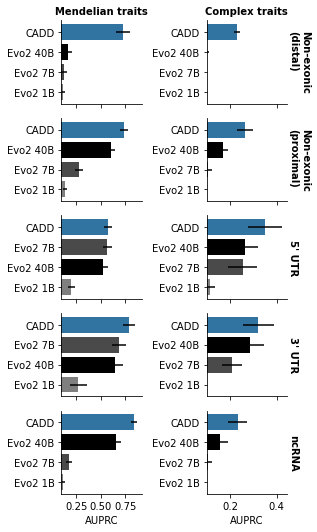

In [8]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    row="subset",
    col="dataset",
    margin_titles=True,
    sharex="col",
    sharey=False,
    #height=1.1,
    #aspect=1.8,
    height=1.5,
    aspect=1.5,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="model",
        x="AUPRC",
        ax=ax,
        palette=palette,
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    fontweight="bold",
    #size=12,
)
g.tight_layout()
plt.savefig("../../results/plots/performance_by_consequence_evo2.pdf", bbox_inches="tight")